# 2. Grouping songs together!
We play with a dataset gathering songs from the International Society for Music Information Retrieval Conference. The tracks (songs) include much information. We focus on the **track information**, features (extracted with librosa library from Python) and **audio variables** provided by Echonest (now Spotify).

*The final goal is to group songs into similar genres, therefore **DO NOT** use the feature genre in your k-means anaylsis*

To solve this task, you must accomplish the next stages:
## 2.1 Getting your data!
1. Access to the data can be found here:
    - echonest.csv
    - features.csv
    - tracks.csv
2. Data Scientists are often challenged to do Data Wrangling. The latter is a process of cleaning and unifying messy and complex data sets for easy access and analysis (see more info here). You are supposed to create one single data set by merging **tracks.csv**, **features.csv** and **echonest.csv**. It's your job to find the correct *key* to join your data sets together. You should end up with a data set of ~13K rows.

First, let's start by adding important libraries and importing datasets.
Each .csv file contains some information about tracks.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
d1 = pd.read_csv('echonest.csv')
d2 = pd.read_csv('features.csv')
d3 = pd.read_csv('tracks.csv')
d1

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966


In [3]:
d2

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904
106572,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133


In [4]:
d3

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


### Merging datasets
After importing each dataset, we now need to merge them into one dataframe. To do that we must to define a *key* that will let us merge them correctly. One common column for every dataset is **track_id**. Let's use that.

In [5]:
pd.merge(pd.DataFrame(d1['track_id']), pd.DataFrame(d3['track_id']), how='inner')

,track_id
0,2
1,3
2,5
3,10
4,134
...,...
13124,124857
13125,124862
13126,124863
13127,124864


Checking how many common rows are there between d1 and d3. We should end up with a data set of **~13K rows**, and it checks out, so we assume **track_id** is the correct key.

Now that we established that, let's start merging.

In [6]:
# merging d2 and d3 to the temporary dataframe
temp = d2.set_index('track_id').join(d3.set_index('track_id'), how='outer').reset_index()
temp

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [7]:
# merging temporary dataframe we created above with d1 and getting our final dataframe
df = d1.set_index('track_id').join(temp.set_index('track_id'), how='inner').reset_index()
df

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,NaN,20996,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,13365,NaN,8,NaN,[],I'm Wearing My Dancing Pants
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,NaN,4501,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,3588,NaN,9,NaN,[],Me Funky You Jane
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,NaN,3641,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,2956,NaN,10,NaN,[],Ain't Mad at Ya
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,NaN,3960,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,3126,NaN,11,NaN,[],This Is Not the End


After merging three datasets, we end up with the dataframe of **13129 rows** and **820 columns**.

Let's free up some memory by deleting not necessary data.

In [8]:
del d1
del d2
del d3
del temp

## 2.2 Choose your features (variables)!

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df

track_id  audio_features_acousticness  audio_features_danceability  \
0             2                     0.416675                     0.675894   
1             3                     0.374408                     0.528643   
2             5                     0.043567                     0.745566   
3            10                     0.951670                     0.658179   
4           134                     0.452217                     0.513238   
...         ...                          ...                          ...   
13124    124857                     0.007592                     0.790364   
13125    124862                     0.041498                     0.843077   
13126    124863                     0.000124                     0.609686   
13127    124864                     0.327576                     0.574426   
13128    124911                     0.993606                     0.499339   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.634476                         0.010628   
1                   0.817461                         0.001851   
2                   0.701470                         0.000697   
3                   0.924525                         0.965427   
4                   0.560410                         0.019443   
...                      ...                              ...   
13124               0.719288                         0.853114   
13125               0.536496                         0.865151   
13126               0.895136                         0.846624   
13127               0.548327                         0.452867   
13128               0.050622                         0.945677   

       audio_features_liveness  audio_features_speechiness  \
0                     0.177647                    0.159310   
1                     0.105880                    0.461818   
2                     0.373143                    0.124595   
3                     0.115474                    0.032985   
4                     0.096567                    0.525519   
...                        ...                         ...   
13124                 0.720715                    0.082550   
13125                 0.547949                    0.074001   
13126                 0.632903                    0.051517   
13127                 0.075928                    0.033388   
13128                 0.095965                    0.065189   

       audio_features_tempo  audio_features_valence metadata_album_date  \
0                   165.922                0.576661                 NaN   
1                   126.957                0.269240                 NaN   
2                   100.260                0.621661                 NaN   
3                   111.562                0.963590          2008-03-11   
4                   114.290                0.894072                 NaN   
...                     ...                     ...                 ...   
13124               141.332                0.890461                 NaN   
13125               101.975                0.476845                 NaN   
13126               129.996                0.496667                 NaN   
13127               142.009                0.569274                 NaN   
13128               119.965                0.204652          2009-10-23   

       metadata_album_name  metadata_artist_latitude  \
0                      NaN                   32.6783   
1                      NaN                   32.6783   
2                      NaN                   32.6783   
3        Constant Hitmaker                   39.9523   
4                      NaN                   32.6783   
...                    ...                       ...   
13124                  NaN                   52.1082   
13125                  NaN                   52.1082   
13126                  NaN                   52.1082   
13127                  NaN                   52.1082   
13128  Suicide Beauty Girl             

In [10]:
df['metadata_artist_longitude'].describe()

count    9770.000000
mean      -49.984040
std        59.377974
min      -155.434000
25%       -87.632400
50%       -74.007100
75%        -0.127140
max       174.770000
Name: metadata_artist_longitude, dtype: float64

In [11]:
df['metadata_artist_longitude'] = df['metadata_artist_longitude'].apply(lambda l: l if not np.isnan(l) 
                                        else np.random.choice(np.arange(df['metadata_artist_longitude'].min(), df['metadata_artist_longitude'].max())))

In [12]:
df['metadata_artist_longitude'].describe()

count    13129.000000
mean       -34.809953
std         74.996026
min       -155.434000
25%        -86.150000
50%        -72.925000
75%          8.365140
max        174.770000
Name: metadata_artist_longitude, dtype: float64

In [13]:
df['metadata_artist_latitude'].describe()

count    9770.000000
mean       39.961892
std        15.554275
min       -45.867100
25%        37.784827
50%        40.781400
75%        47.254575
max        68.927500
Name: metadata_artist_latitude, dtype: float64

In [14]:
df['metadata_artist_latitude'] = df['metadata_artist_latitude'].apply(lambda l: l if not np.isnan(l) 
                                        else np.random.choice(np.arange(df['metadata_artist_latitude'].min(), df['metadata_artist_latitude'].max())))

In [15]:
df['metadata_artist_latitude'].describe()

count    13129.000000
mean        32.796717
std         24.732379
min        -45.867100
25%         33.132900
50%         40.655100
75%         46.020700
max         68.927500
Name: metadata_artist_latitude, dtype: float64

In [16]:
df['track_title'] = df['track_title'].fillna('-')
df['track_language_code'] = df['track_language_code'].fillna('-')
df['metadata_artist_location'] = df['metadata_artist_location'].fillna('-')
df['artist_date_created'] = df['artist_date_created'].fillna('-')
df['album_type'] = df['album_type'].fillna('-')

In [17]:
info = pd.DataFrame([df.columns, df.dtypes, df.isna().sum()], ['Column', 'dtype', 'NumOfNA']).T
info

,Column,dtype,NumOfNA
0,track_id,int64,0
1,audio_features_acousticness,float64,0
2,audio_features_danceability,float64,0
3,audio_features_energy,float64,0
4,audio_features_instrumentalness,float64,0
...,...,...,...
815,track_lyricist,object,13055
816,track_number,int64,0
817,track_publisher,object,12977
818,track_tags,object,0


In [18]:
pd.set_option('display.max_rows', None)

In [19]:
info.sort_values('NumOfNA', ascending=False)[info['NumOfNA'] != 0]

<ipython-input-19-3a441c469d93>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  info.sort_values('NumOfNA', ascending=False)[info['NumOfNA'] != 0]


,Column,dtype,NumOfNA
815,track_lyricist,object,13055
817,track_publisher,object,12977
782,artist_active_year_end,object,12635
802,track_composer,object,12605
810,track_information,object,12310
797,artist_wikipedia_page,object,11898
794,artist_related_projects,object,11385
19,ranks_song_currency_rank,float64,11096
20,ranks_song_hotttnesss_rank,float64,10923
783,artist_associated_labels,object,10872


In [20]:
pd.set_option('display.max_rows', 20)

In [21]:
df.dropna(axis=1, how='any', inplace=True)
df

track_id  audio_features_acousticness  audio_features_danceability  \
0             2                     0.416675                     0.675894   
1             3                     0.374408                     0.528643   
2             5                     0.043567                     0.745566   
3            10                     0.951670                     0.658179   
4           134                     0.452217                     0.513238   
...         ...                          ...                          ...   
13124    124857                     0.007592                     0.790364   
13125    124862                     0.041498                     0.843077   
13126    124863                     0.000124                     0.609686   
13127    124864                     0.327576                     0.574426   
13128    124911                     0.993606                     0.499339   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.634476                         0.010628   
1                   0.817461                         0.001851   
2                   0.701470                         0.000697   
3                   0.924525                         0.965427   
4                   0.560410                         0.019443   
...                      ...                              ...   
13124               0.719288                         0.853114   
13125               0.536496                         0.865151   
13126               0.895136                         0.846624   
13127               0.548327                         0.452867   
13128               0.050622                         0.945677   

       audio_features_liveness  audio_features_speechiness  \
0                     0.177647                    0.159310   
1                     0.105880                    0.461818   
2                     0.373143                    0.124595   
3                     0.115474                    0.032985   
4                     0.096567                    0.525519   
...                        ...                         ...   
13124                 0.720715                    0.082550   
13125                 0.547949                    0.074001   
13126                 0.632903                    0.051517   
13127                 0.075928                    0.033388   
13128                 0.095965                    0.065189   

       audio_features_tempo  audio_features_valence  metadata_artist_latitude  \
0                   165.922                0.576661                   32.6783   
1                   126.957                0.269240                   32.6783   
2                   100.260                0.621661                   32.6783   
3                   111.562                0.963590                   39.9523   
4                   114.290                0.894072                   32.6783   
...                     ...                     ...                       ...   
13124               141.332                0.890461                   52.1082   
13125               101.975                0.476845                   52.1082   
13126               129.996                0.496667                   52.1082   
13127               142.009                0.569274                   52.1082   
13128               119.965                0.204652                   35.7497   

                      metadata_artist_location  metadata_artist_longitude  \
0                                  Georgia, US                  -83.22300   
1                                  Georgia, US                  -83.22300   
2                                  Georgia, US                  -83.22300   
3                         Philadelphia, PA, US                  -75.16240   
4                                  Georgia, US                  -83.22300   
...                                        ...                        ...   
13124                              Netherlan

In [22]:
gen_info = df.iloc[:, 761:]
gen_info['metadata_artist_location'] = df['metadata_artist_location']
gen_info['metadata_artist_latitude'] = df['metadata_artist_latitude']
gen_info['metadata_artist_longitude'] = df['metadata_artist_longitude']
gen_info['track_id'] = df['track_id']
gen_info = gen_info[[gen_info.columns[-1]]+list(gen_info.columns[:-1])]
gen_info

,track_id,album_comments,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,artist_comments,artist_date_created,artist_favorites,artist_id,artist_name,artist_tags,set_split,set_subset,track_bit_rate,track_comments,track_date_created,track_duration,track_favorites,track_genres,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_tags,track_title,metadata_artist_location,metadata_artist_latitude,metadata_artist_longitude
0,2,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,2008-11-26 01:42:32,9,1,AWOL,['awol'],training,small,256000,0,2008-11-26 01:48:12,168,2,[21],[21],4656,en,1293,3,[],Food,"Georgia, US",32.6783,-83.22300
1,3,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,2008-11-26 01:42:32,9,1,AWOL,['awol'],training,medium,256000,0,2008-11-26 01:48:14,237,1,[21],[21],1470,en,514,4,[],Electric Ave,"Georgia, US",32.6783,-83.22300
2,5,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,2008-11-26 01:42:32,9,1,AWOL,['awol'],training,small,256000,0,2008-11-26 01:48:20,206,6,[21],[21],1933,en,1151,6,[],This World,"Georgia, US",32.6783,-83.22300
3,10,0,4,6,47632,[],Constant Hitmaker,2,Album,3,2008-11-26 01:42:55,74,6,Kurt Vile,"['philly', 'kurt vile']",training,small,192000,0,2008-11-25 17:49:06,161,178,[10],[10],54881,en,50135,1,[],Freeway,"Philadelphia, PA, US",39.9523,-75.16240
4,134,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,2008-11-26 01:42:32,9,1,AWOL,['awol'],training,medium,256000,0,2008-11-26 01:43:19,207,3,[21],[21],1126,en,943,5,[],Street Music,"Georgia, US",32.6783,-83.22300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0,0,18862,55904,[],Do You Know The Word,14,Album,0,2015-09-09 14:02:39,8,20818,BASIC,['basic'],training,large,320000,0,2015-09-09 14:40:09,268,11,"[286, 542]","[542, 21, 286, 15]",20996,-,13365,8,[],I'm Wearing My Dancing Pants,Netherlands,52.1082,5.32986
13125,124862,0,0,18862,55904,[],Do You Know The Word,14,Album,0,2015-09-09 14:02:39,8,20818,BASIC,['basic'],training,large,320000,0,2015-09-09 14:56:06,244,3,"[286, 542]","[542, 21, 286, 15]",4501,-,3588,9,[],Me Funky You Jane,Netherlands,52.1082,5.32986
13126,124863,0,0,18862,55904,[],Do You Know The Word,14,Album,0,2015-09-09 14:02:39,8,20818,BASIC,['basic'],training,large,320000,0,2015-09-09 14:56:06,382,2,"[286, 542]","[542, 21, 286, 15]",3641,-,2956,10,[],Ain't Mad at Ya,Netherlands,52.1082,5.32986
13127,124864,0,0,18862,55904,[],Do You Know The Word,14,Album,0,2015-09-09 14:02:39,8,20818,BASIC,['basic'],training,large,320000,0,2015-09-09 14:56:08,290,5,"[286, 542]","[542, 21, 286, 15]",3960,-,3126,11,[],This Is Not the End,Netherlands,52.1082,5.32986


In [23]:
pd.set_option('display.max_columns', 20)

In [24]:
sound_info = df.iloc[:, 1:761]
del sound_info['metadata_artist_latitude']
del sound_info['metadata_artist_longitude']
sound_info

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_location,metadata_artist_name,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,"Georgia, US",AWOL,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,"Georgia, US",AWOL,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,"Georgia, US",AWOL,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,"Philadelphia, PA, US",Kurt Vile,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,"Georgia, US",AWOL,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,Netherlands,Basic,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,Netherlands,Basic,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,Netherlands,Basic,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,Netherlands,Basic,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


In [25]:
# Dropping the columns with non-numeric datatypes to be able to apply metrics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sound_info = sound_info.select_dtypes(include=numerics)
sound_info

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,0.430808,0.456871,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,0.430808,0.456871,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,0.430808,0.456871,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,0.430808,0.456871,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


In [26]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(.70)
pca.fit(sound_info)

PCA(n_components=0.7)

In [33]:
x = pca.transform(sound_info)

In [34]:
new_sound_info = pd.DataFrame(x, columns=['audio_feature_' + str(i) for i in range(len(x[0]))])
new_sound_info['track_id'] = df['track_id']
new_sound_info

,audio_feature_0,audio_feature_1,audio_feature_2,track_id
0,-816.840302,1176.719466,-504.123434,2
1,-1425.837812,1711.007971,-82.848599,3
2,-989.397977,533.225066,-304.797940,5
3,-2165.351686,-200.771438,304.073508,10
4,2555.920203,-156.929590,-782.675081,134
...,...,...,...,...
13124,-1143.966342,1477.307094,-1025.390987,124857
13125,2422.445985,435.279049,-594.550025,124862
13126,-571.045206,1143.535935,-219.442621,124863
13127,-386.140867,754.660071,785.895160,124864


In [35]:
pca.explained_variance_ratio_

array([0.4303487 , 0.20541179, 0.1080277 ])

In [36]:
# overall varience
sum(pca.explained_variance_ratio_)

0.7437881932076243

In [37]:
df = pd.merge(gen_info, new_sound_info, on='track_id')
df

,track_id,album_comments,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,artist_comments,...,track_listens,track_number,track_tags,track_title,metadata_artist_location,metadata_artist_latitude,metadata_artist_longitude,audio_feature_0,audio_feature_1,audio_feature_2
0,2,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,1293,3,[],Food,"Georgia, US",32.6783,-83.22300,-816.840302,1176.719466,-504.123434
1,3,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,514,4,[],Electric Ave,"Georgia, US",32.6783,-83.22300,-1425.837812,1711.007971,-82.848599
2,5,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,1151,6,[],This World,"Georgia, US",32.6783,-83.22300,-989.397977,533.225066,-304.797940
3,10,0,4,6,47632,[],Constant Hitmaker,2,Album,3,...,50135,1,[],Freeway,"Philadelphia, PA, US",39.9523,-75.16240,-2165.351686,-200.771438,304.073508
4,134,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,943,5,[],Street Music,"Georgia, US",32.6783,-83.22300,2555.920203,-156.929590,-782.675081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,13365,8,[],I'm Wearing My Dancing Pants,Netherlands,52.1082,5.32986,-1143.966342,1477.307094,-1025.390987
13125,124862,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,3588,9,[],Me Funky You Jane,Netherlands,52.1082,5.32986,2422.445985,435.279049,-594.550025
13126,124863,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,2956,10,[],Ain't Mad at Ya,Netherlands,52.1082,5.32986,-571.045206,1143.535935,-219.442621
13127,124864,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,3126,11,[],This Is Not the End,Netherlands,52.1082,5.32986,-386.140867,754.660071,785.895160


## 2.3 Clustering!
1. Implement the K-means clustering algorithm (not ++: random initialization). We ask you to write the algorithm from scratch following what you learned in class.

2. Find an optimal number of clusters. Use at least two different methods. In case that your algorithms provide different optimal K's, select one of them and explain why you chose it.

3. Run the algorithm on the data that you got from the dimensionality reduction.

4. Then, use the already implemented version of k-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results.

In [35]:
def my_Kmeans(X, y, k):
    
    ##################################
    #                                #
    #   X, y - columns of dataset    #
    #   k - number of clusters       #
    #                                #
    ##################################
    
    # Picking k random centroids (k1_i, k2_i),  i = 0,...,k-1
    k1 = np.max(X)*np.random.rand(k)
    k2 = np.max(y)*np.random.rand(k)
    
    # Declaring a zero matrix of distances with the shape [len(df), k]
    # it will contain distances of each point to each centroid
    distances = np.zeros((X.shape[0], k))
    
    # Set the limit to 100 loops in case the it will take a lot of time to converge
    for stp in range(100):
        # After calculating distances, we will classify each point to the cluster they belong
        classification = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            for j in range(k):
                # Using Euclidean distance to calculate distances
                distances[i][j] = np.linalg.norm(np.array((k1[j],k2[j]))-np.array((X[i], y[i])))
            # Classifying each dot to the centroid to which it has the minimum distance 
            classification[i] += np.argmin(distances[i])
            
        # Saving previous centroids
        prev = [k1.copy(), k2.copy()]
        
        # Calculating new centroids by taking the average distance of all dots in the cluster
        for i in range(k):
            k1[i] = np.mean(X[np.where(classification == i)])
            k2[i] = np.mean(y[np.where(classification == i)])
        
        # If previous centroids are equal to new centroids, the outer loop stops and we return the result
        if (prev[0] == k1).all() and (prev[1] == k2).all():
            # Plotting the end results
            for i in range(k):
                plt.scatter(X[np.where(classification == i)], y[np.where(classification == i)], s=20) 
            plt.scatter(k1, k2, s=50, c='black')
            plt.show()
            # Printing the number of steps needed for the centroids to converge
            print('Steps needed to calculate K-means: ', stp)
            # Print the end centroids
            print('Clusters:\n', pd.DataFrame([k1, k2]).T)
            # Returning classification dataframe so that we can use it for Task 2.4
            return pd.DataFrame(classification, columns=['Cluster'])

### Testing our method

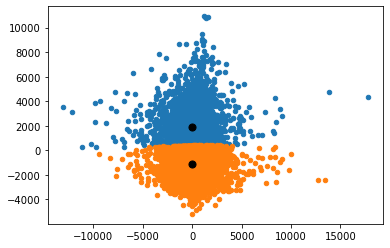

Steps needed to calculate K-means:  15
Clusters:
            0            1
0 -37.555255  1888.965086
1  22.014993 -1107.316491


In [36]:
clusters = my_Kmeans(np.array(df['audio_feature_2']), np.array(df['audio_feature_1']), 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0A3C3E370>]],
      dtype=object)

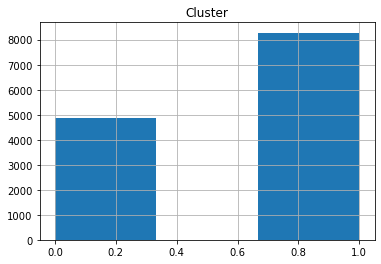

In [37]:
clusters.hist(bins=3)

In [38]:
temp = pd.DataFrame([df['audio_feature_2'],df['audio_feature_1']]).T
temp['Clusters'] = clusters
temp

,audio_feature_2,audio_feature_1,Clusters
0,-504.123434,1176.719466,0.0
1,-82.848599,1711.007971,0.0
2,-304.797940,533.225066,0.0
3,304.073508,-200.771438,1.0
4,-782.675081,-156.929590,1.0
...,...,...,...
13124,-1025.390987,1477.307094,0.0
13125,-594.550025,435.279049,0.0
13126,-219.442621,1143.535935,0.0
13127,785.895160,754.660071,0.0


### Now let's compare with the already implemented function from sklearn

In [39]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(pd.DataFrame([df['audio_feature_2'],df['audio_feature_1']]).T)

KMeans(n_clusters=2)

In [40]:
labels = Kmean.fit_predict(pd.DataFrame([df['audio_feature_2'],df['audio_feature_1']]).T)
labels

array([1, 1, 1, ..., 1, 1, 0])

In [41]:
Kmean.cluster_centers_

array([[   15.40232176, -1110.83199315],
       [  -26.11216857,  1883.23765129]])

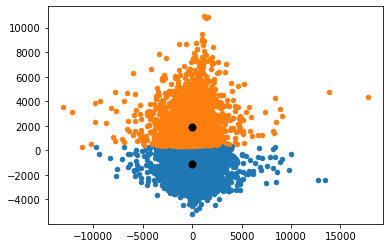

In [42]:
for i in range(Kmean.n_clusters):
    plt.scatter(pd.DataFrame([df['audio_feature_2'],df['audio_feature_1']]).T[labels == i]['audio_feature_2'], 
            pd.DataFrame([df['audio_feature_2'],df['audio_feature_1']]).T[labels == i]['audio_feature_1'], s = 20)
    plt.scatter(Kmean.cluster_centers_[i][0], Kmean.cluster_centers_[i][1], s=50, c='black')
plt.show()

Results are almost identical, that means our methods works as intended

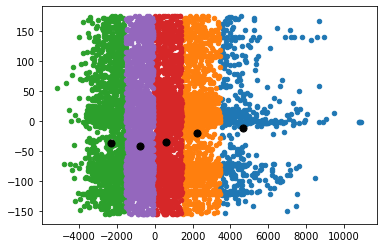

Steps needed to calculate K-means:  58
Clusters:
              0          1
0  4685.064107 -12.162017
1  2228.999182 -20.791451
2 -2298.656467 -37.527154
3   597.737572 -36.124796
4  -761.332169 -41.860935


In [47]:
clusters = my_Kmeans(np.array(df['audio_feature_1']), np.array(df['metadata_artist_longitude']), 5)

In [44]:
temp = pd.DataFrame([df['metadata_artist_longitude'],df['audio_feature_0']]).T
temp['Clusters'] = clusters
temp

,metadata_artist_longitude,audio_feature_0,Clusters
0,-83.22300,-816.840302,2.0
1,-83.22300,-1425.837812,2.0
2,-83.22300,-989.397977,2.0
3,-75.16240,-2165.351686,2.0
4,-83.22300,2555.920203,0.0
...,...,...,...
13124,5.32986,-1143.966342,2.0
13125,5.32986,2422.445985,0.0
13126,5.32986,-571.045206,2.0
13127,5.32986,-386.140867,2.0


### Some test data, delete before the final version

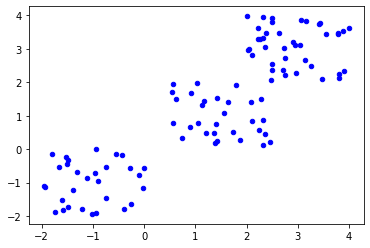

In [171]:
X = 2+2*np.random.rand(100)
X[0:30] = -2 * np.random.rand(30)
X[31:61] = 0.5 + 2 * np.random.rand(30)
y = 2+2*np.random.rand(100)
y[0:30] = -2 * np.random.rand(30)
y[31:61] = 2 * np.random.rand(30)
plt.scatter(X, y, s=20, c='b')
plt.show()

In [226]:
k = 3
k1 = np.max(X)*np.random.rand(k)
k2 = np.max(y)*np.random.rand(k)
print(k1)
print(k2)

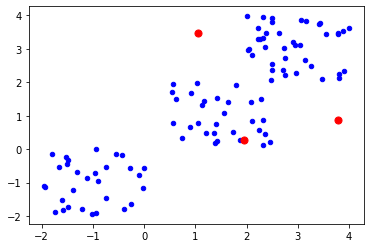

In [229]:
plt.scatter(X, y, s=20, c='b')
plt.scatter(k1, k2, s=50, c='r')
plt.show()

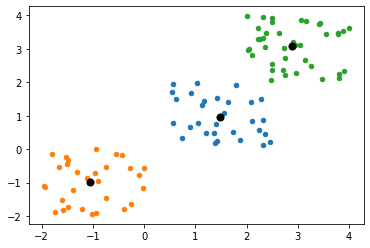

0


In [232]:
my_Kmeans(X, y, 3)

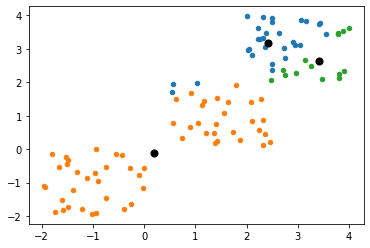

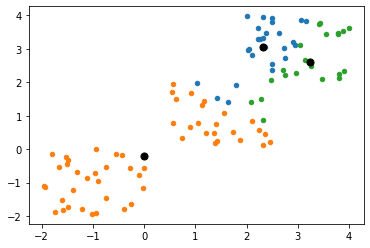

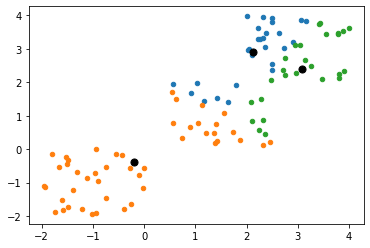

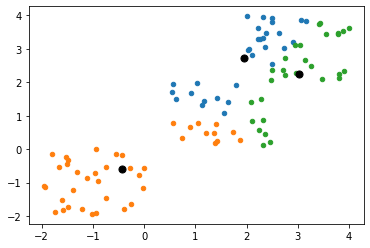

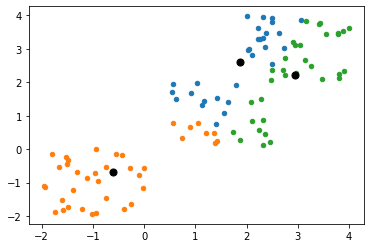

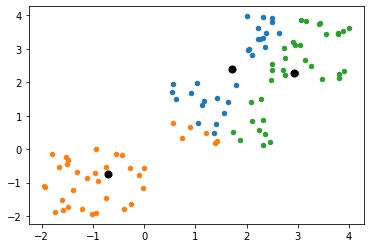

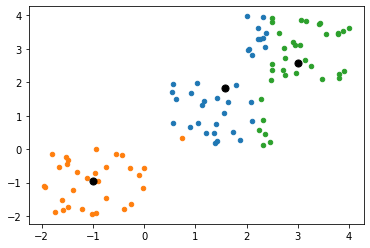

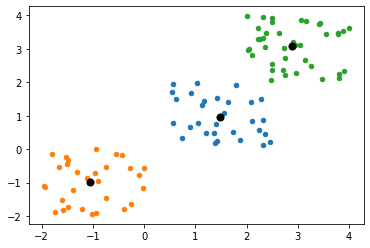

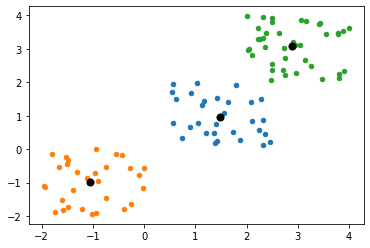

Steps needed to calculate K-means:  8


In [231]:
distances = np.zeros((X.shape[0], k))
for stp in range(100):
    classification = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for j in range(k):
            distances[i][j] = np.linalg.norm(np.array((k1[j],k2[j]))-np.array((X[i], y[i])))
        classification[i] += np.argmin(distances[i])
    prev = [k1.copy(), k2.copy()]
    for i in range(k):
        k1[i] = np.mean(X[np.where(classification == i)])
        k2[i] = np.mean(y[np.where(classification == i)])
    for i in range(k):
        plt.scatter(X[np.where(classification == i)], y[np.where(classification == i)], s=20) 
    plt.scatter(k1, k2, s=50, c='black')
    plt.show()
    if (prev[0] == k1).all() and (prev[1] == k2).all():
        print('Steps needed to calculate K-means: ', stp)
        break